<a href="https://colab.research.google.com/github/t1mmy89ru/nyu-python-public-policy/blob/master/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from google.colab import drive

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [0]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data.csv', header='infer')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,18,21,32,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
noise = df[df.complaint_type == 'Noise - Residential']
heatwater = df[df.complaint_type == 'HEAT/HOT WATER']
other = df[(df.complaint_type != 'HEAT/HOT WATER') & (df.complaint_type != 'Noise - Residential')]

In [0]:
count_noise = noise.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_noise))

count_heatwater = heatwater.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_heatwater))

count_other = other.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_other))

# note: we won't use count_all in the charts, but we can use it as a check that the subsets all add up to the correct total
count_all = df.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_all))

69
66
77
77


In [0]:
valid_borocds = ['101','102','103','104','105','106','107','108','109','110','111','112','201','202','203','204','205','206','207','208','209','210','211','212','301','302','303','304','305','306','307','308','309','310','311','312','313','314','315','316','317','318','401','402','403','404','405','406','407','408','409','410','411','412','413','414','501','502','503']

In [0]:
# this function will recode the community_board value into borocd in a new column

def recode_borocd_counts(row):
  if row.community_board[0] != 'U':
    if 'MANHATTAN' in row.community_board:
      return '1' + row.community_board[0:2]
    elif 'BRONX' in row.community_board:
      return '2' + row.community_board[0:2]
    elif 'BROOKLYN' in row.community_board:
      return '3' + row.community_board[0:2]
    elif 'QUEENS' in row.community_board:
      return '4' + row.community_board[0:2]
    elif 'STATEN ISLAND' in row.community_board:
      return '5' + row.community_board[0:2]
  else:
    return 'Invalid borocd'

# we can apply the function to each of our dataframes. this is the beauty of functions; you can reuse them on multiple objects!

count_noise['borocd'] = count_noise.apply(recode_borocd_counts, axis=1)

count_heatwater['borocd'] = count_heatwater.apply(recode_borocd_counts, axis=1)

count_other['borocd'] = count_other.apply(recode_borocd_counts, axis=1)

count_all['borocd'] = count_all.apply(recode_borocd_counts, axis=1)

In [0]:
count_noise = count_noise[count_noise.borocd.isin(valid_borocds)]
print(len(count_noise))

count_heatwater = count_heatwater[count_heatwater.borocd.isin(valid_borocds)]
print(len(count_heatwater))

count_other = count_other[count_other.borocd.isin(valid_borocds)]
print(len(count_other))

count_all = count_all[count_all.borocd.isin(valid_borocds)]
print(len(count_all))

59
59
59
59


In [0]:
print(count_noise.head())
print(count_heatwater.head())
print(count_other.head())
print(count_all.head())

    community_board  count_of_311_requests borocd
1          01 BRONX                   3691    201
2       01 BROOKLYN                   5844    301
3      01 MANHATTAN                    722    101
4         01 QUEENS                   4589    401
5  01 STATEN ISLAND                   5052    501
    community_board  count_of_311_requests borocd
0          01 BRONX                   3346    201
1       01 BROOKLYN                   2868    301
2      01 MANHATTAN                    276    101
3         01 QUEENS                   2466    401
4  01 STATEN ISLAND                   1644    501
    community_board  count_of_311_requests borocd
1          01 BRONX                  20316    201
2       01 BROOKLYN                  59389    301
3      01 MANHATTAN                  20261    101
4         01 QUEENS                  53370    401
5  01 STATEN ISLAND                  58449    501
    community_board  count_of_311_requests borocd
1          01 BRONX                  27353    201


In [0]:
27353 == 20316 + 3346 + 3691

True

In [0]:
#data cleaning for next question
data_frames = [count_noise, count_heatwater, count_other]
from functools import reduce
merged_data = reduce(lambda left,right: pd.merge(left,right,on=['borocd'],how='inner'), data_frames)

print(merged_data)

cd_data = merged_data[['borocd', 'count_of_311_requests_x', 'count_of_311_requests_y', 'count_of_311_requests']]
cd_data = cd_data.rename(columns={"count_of_311_requests_x":"count_noise","count_of_311_requests_y":"count_heatwater","count_of_311_requests": "count_other"})
print(cd_data)


   community_board_x  count_of_311_requests_x borocd community_board_y  \
0           01 BRONX                     3691    201          01 BRONX   
1        01 BROOKLYN                     5844    301       01 BROOKLYN   
2       01 MANHATTAN                      722    101      01 MANHATTAN   
3          01 QUEENS                     4589    401         01 QUEENS   
4   01 STATEN ISLAND                     5052    501  01 STATEN ISLAND   
5           02 BRONX                     1939    202          02 BRONX   
6        02 BROOKLYN                     3795    302       02 BROOKLYN   
7       02 MANHATTAN                     1837    102      02 MANHATTAN   
8          02 QUEENS                     2279    402         02 QUEENS   
9   02 STATEN ISLAND                     1592    502  02 STATEN ISLAND   
10          03 BRONX                     4238    203          03 BRONX   
11       03 BROOKLYN                     7898    303       03 BROOKLYN   
12      03 MANHATTAN                  

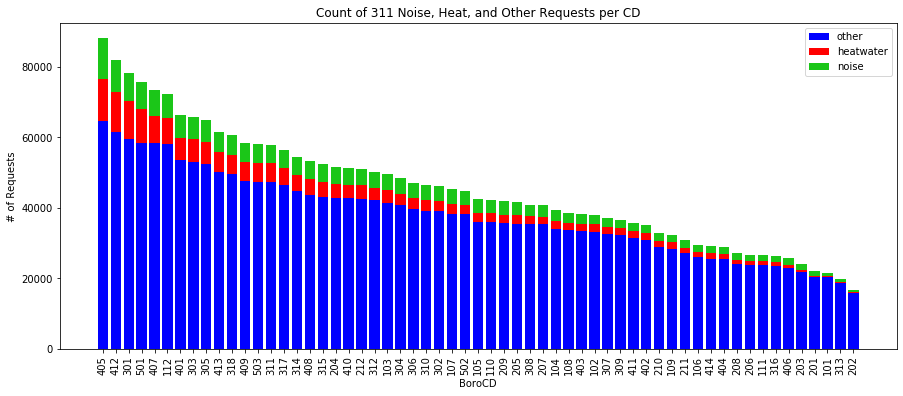

In [0]:
#Step 2. Create a stacked bar chart of 311 requests per community district. Each community district bar should be comprised of three stacked bars, 
#one for each category listed below. The total height of each community district bar (the sum of the three stacked bars) 
#should reflect the total count of 311 complaints per community district.

#number of 'Noise - Residential' complaints per community district
#number of 'HEAT/HOT WATER' complaints per community district
#number of other complaints per community district

# list of bar positions on x axis
position_on_x = np.arange(len(cd_data))

# original set of counts data
# note: it's important to use np.array(series) to convert the pandas series into an array. 
# if you don't do this, the stacking won't work corectly
counts_n = np.array(cd_data.sort_values(by='count_noise', ascending=False).count_noise)
counts_h = np.array(cd_data.sort_values(by='count_heatwater', ascending=False).count_heatwater)
counts_o = np.array(cd_data.sort_values(by='count_other', ascending=False).count_other)

plt.figure(figsize=(15, 6))

# need to name the plots as objects in order to access their color attributes in the legend
plot1 = plt.bar(
  position_on_x,
  counts_o,
  align='center',
  color='blue',
  label='other'
)

# the second plot gets rendered on top of the first

plot2 = plt.bar(
  position_on_x,
  counts_h,
  align='center',
  color='red',
  bottom=counts_o, 
  label='heatwater'
)

# the third plot gets rendered on top of the second
plot3 = plt.bar(
  position_on_x,
  counts_n,
  bottom=counts_o+counts_h, 
  # bottom defines the starting number to which each y value will be added instead of starting at 0
  # the counts value will get added to the corresponding counts_plus_10000 value
  align='center',
  color='#1BC618',
  label='noise'
)

plt.xticks(position_on_x, cd_data.sort_values(by='count_other', ascending=False).borocd, rotation=90)

plt.title('Count of 311 Noise, Heat, and Other Requests per CD')
plt.xlabel('BoroCD')
plt.ylabel('# of Requests')
plt.legend() # defaults to putting legend in top right

plt.show()

In [0]:
#import populatioin dataset for next question
population = pd.read_csv('https://data.cityofnewyork.us/api/views/xi7c-iiu2/rows.csv?accessType=DOWNLOAD', header='infer')
population.head()

,Borough,CD Number,CD Name,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population
0,Bronx,1,"Melrose, Mott Haven, Port Morris",138557,78441,77214,82159,91497
1,Bronx,2,"Hunts Point, Longwood",99493,34399,39443,46824,52246
2,Bronx,3,"Morrisania, Crotona Park East",150636,53635,57162,68574,79762
3,Bronx,4,"Highbridge, Concourse Village",144207,114312,119962,139563,146441
4,Bronx,5,"University Hts., Fordham, Mt. Hope",121807,107995,118435,128313,128200


In [0]:
def recode_borocd_pop(row):
  if row.Borough == 'Manhattan':
    return str(100 + row['CD Number'])
  elif row.Borough == 'Bronx':
    return str(200 + row['CD Number'])
  elif row.Borough == 'Brooklyn':
    return str(300 + row['CD Number'])
  elif row.Borough == 'Queens':
    return str(400 + row['CD Number'])
  elif row.Borough == 'Staten Island':
    return str(500 + row['CD Number'])
  else:
    return 'Invalid borocd'

population['borocd'] = population.apply(recode_borocd_pop, axis=1)

In [107]:
merged_noise = pd.merge(left=count_noise, right=population, left_on='borocd', right_on='borocd')
merged_noise.head()

,community_board,count_of_311_requests,borocd,Borough,CD Number,CD Name,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population
0,01 BRONX,3691,201,Bronx,1,"Melrose, Mott Haven, Port Morris",138557,78441,77214,82159,91497
1,01 BROOKLYN,5844,301,Brooklyn,1,"Williamsburg, Greenpoint",179390,142942,155972,160338,173083
2,01 MANHATTAN,722,101,Manhattan,1,"Battery Park City, Tribeca",7706,15918,25366,34420,60978
3,01 QUEENS,4589,401,Queens,1,"Astoria, Long Island City",185925,185198,188549,211220,191105
4,01 STATEN ISLAND,5052,501,Staten Island,1,"Stapleton, Port Richmond",135875,138489,137806,162609,175756


In [0]:
merged_heatwater = pd.merge(left=count_heatwater, right=population, left_on='borocd', right_on='borocd')

merged_other = pd.merge(left=count_other, right=population, left_on='borocd', right_on='borocd')

merged_noise = pd.merge(left=count_noise, right=population, left_on='borocd', right_on='borocd')


In [109]:
noise_scatter = [ # one subset for all borocd records in manhattan.
  # we are creating a list of two lists. x = population in thousands
  [merged_noise['2010 Population']/1000],
  # y = count of 311 requests
  [merged_noise.count_of_311_requests]
]

heatwater_scatter = [
  [merged_heatwater['2010 Population']/1000],
  [merged_heatwater.count_of_311_requests]
]

other_scatter = [
  [merged_other['2010 Population']/1000],
  [merged_other.count_of_311_requests]
]
print(noise_scatter)

[[0      91.497
1     173.083
2      60.978
3     191.105
4     175.756
5      52.246
6      99.617
7      90.016
8     113.200
9     132.003
10     79.762
11    152.985
12    163.277
13    171.576
14    160.209
15    146.441
16    112.634
17    103.245
18    172.598
19    128.200
20    182.896
21     51.673
22    169.190
23     83.268
24    104.709
25    142.745
26    113.257
27    139.286
28    126.230
29    209.084
30    247.354
31    101.731
32     96.317
33    219.920
34    151.107
35    172.298
36     98.429
37    110.193
38    143.317
39    120.392
40    124.491
41    115.723
42    122.396
43    113.232
44    181.981
45    120.511
46    116.431
47    152.344
48    191.382
49    190.020
50    225.919
51    104.278
52    188.593
53    160.664
54    114.978
55    159.650
56     86.468
57    155.252
58    193.543
Name: 2010 Population, dtype: float64], [0      3691
1      5844
2       722
3      4589
4      5052
5      1939
6      3795
7      1837
8      2279
9      1592
10     4238

[[[0      91.497
1     173.083
2      60.978
3     191.105
4     175.756
5      52.246
6      99.617
7      90.016
8     113.200
9     132.003
10     79.762
11    152.985
12    163.277
13    171.576
14    160.209
15    146.441
16    112.634
17    103.245
18    172.598
19    128.200
20    182.896
21     51.673
22    169.190
23     83.268
24    104.709
25    142.745
26    113.257
27    139.286
28    126.230
29    209.084
30    247.354
31    101.731
32     96.317
33    219.920
34    151.107
35    172.298
36     98.429
37    110.193
38    143.317
39    120.392
40    124.491
41    115.723
42    122.396
43    113.232
44    181.981
45    120.511
46    116.431
47    152.344
48    191.382
49    190.020
50    225.919
51    104.278
52    188.593
53    160.664
54    114.978
55    159.650
56     86.468
57    155.252
58    193.543
Name: 2010 Population, dtype: float64], [0      3691
1      5844
2       722
3      4589
4      5052
5      1939
6      3795
7      1837
8      2279
9      1592
10     423

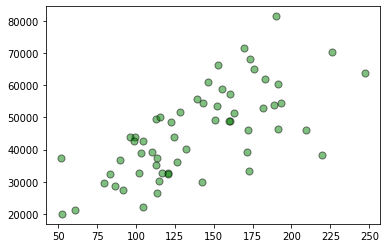

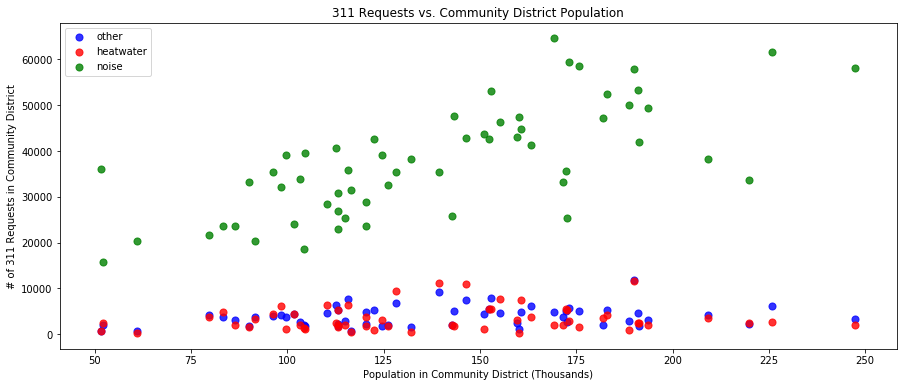

In [112]:
#Step 3. Using the same three dataframes created in Step 1, create a scatter plot of community district population (x-axis) vs. community district 311 counts 
#(y-axis) split out by complaint category (noise, heat/water, other). The scatter plot should show the counts of each of the three complaint categories in a different color.

x = np.array(new_cd_data['2010 Population']/1000)
y = np.array(new_cd_data.total_count)

data_per_cd = [noise_scatter, heatwater_scatter, other_scatter]

print(data_per_cd)

area = 50 

plt.scatter(x, y, s=area, c=color, edgecolors='black', alpha=0.5) 

# define the color to be used for the markers for each data subset group
colors = ["blue", "red", "green"]

# define the labels to be used for the data subset group
groups = ["other", "heatwater", "noise"]

plt.figure(figsize=(15,6))

for data, color, group in zip(data_per_cd, colors, groups): 
  x, y = data
  plt.scatter(x, y, alpha=0.8, c=color, s=50, label=group)

plt.title('311 Requests vs. Community District Population by complaint type')
plt.xlabel('Population in Community District (Thousands)')
plt.ylabel('# of 311 Requests in Community District')

# add legend at specified location
# loc=1 top right
# loc=2 top left
# loc=3 bottom left
plt.legend(loc=2)

plt.show()





In [0]:
#Does it seem like there's a positive correlation between population and noise complaints or population and heat/water complaints?
#What's a possible explanation for the relationship or lack of relationship?

#Answer: There does seem to be a positive relationship between population and noise complaints. This might be because the distribution of both 
#complaints is similar in all districts, regardless of population.

#Note: some code for generating scatterplot is borrowed from John Petinos